![example](images/director_shot.jpeg)

# Helping Microsoft take over the film industry.

**Authors:** Le Truong
***

## Overview


Microsoft is one of the world's longstanding leaders in technology. Aside from corporate sponsorships and Windows Media Player, they have remained silent and distant from the film industry. **This is all about to change!** Microsoft has recently teamed up with Flatiron School to help them identify what variable they need to focus on to produce a successful movie. There are many factors that determine a film's successes. In this presentation, I will focus on three variables that correlate with ratings to help point Microsoft in the right direction. 

## Data Understanding

- This data used for this presented was provided by Flatiron and contains IMDB ratings, genres, production budgets, and runtimes. 

# Questions to be Answered
### Overarching Question: What information can we provide to Microsoft that will be usefull when creating a successful film?
- Does a movie's runtime impact it's ratings? 
- Are there specific genres?
- Is there a correlation between a large production budget and higher ratings?

## Base codes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **First Question**: Do longer movies(<=300 minutes) have lower ratings than shorter movies? 

In [2]:
imdb_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
imdb_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [3]:
imdb_titles_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_titles_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [4]:
imdb_time_rating = pd.merge(imdb_titles_basics, imdb_ratings, on='tconst')
imdb_time_rating.drop(['tconst'], axis=1, inplace=True)
imdb_time_rating

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73851,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [5]:
imdb_time_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   original_title   73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
imdb_time_rating.duplicated().sum()

0

In [7]:
imdb_time_rating.isna().sum()

primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [8]:
imdb_time_rating.dropna(subset=['runtime_minutes', 'genres'], inplace=True)
imdb_time_rating

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...
73849,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [9]:
imdb_time_rating['averagerating'].astype('int64')

0        7
1        7
2        6
4        6
6        8
        ..
73849    8
73850    6
73851    6
73852    8
73855    6
Name: averagerating, Length: 65720, dtype: int64

In [10]:
imdb_time_rating['runtime_minutes'].astype('int64')

0        175
1        114
2        122
4         80
6         83
        ... 
73849    130
73850     86
73851     75
73852     98
73855     72
Name: runtime_minutes, Length: 65720, dtype: int64

In [11]:
imdb_time_rating = imdb_time_rating[imdb_time_rating['runtime_minutes'] < 300]

C:\Users\Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


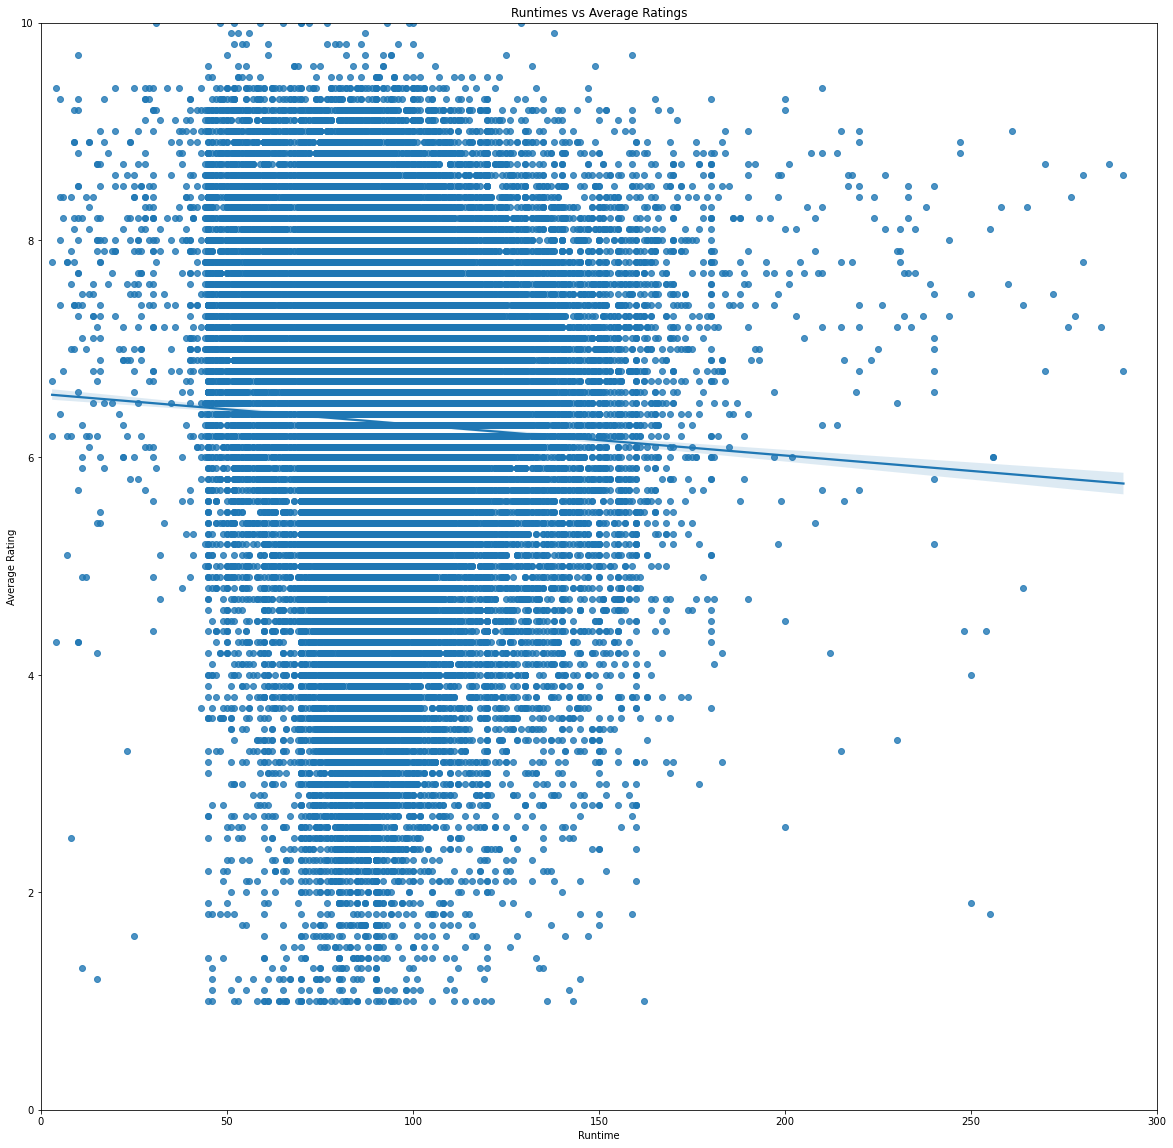

In [12]:
fig, ax = plt.subplots(figsize = (20,20))
copy = imdb_time_rating.copy()
copy = copy[copy.runtime_minutes < 300]
sns.regplot(copy['runtime_minutes'],copy['averagerating'], ax=ax)
ax.set_title('Runtimes vs Average Ratings')
ax.set_xlabel('Runtime')
ax.set_ylabel('Average Rating')
ax.set(ylim=(0, 10))
ax.set(xlim=(0,300));

In [13]:
x_run = copy['runtime_minutes']
y_rating = copy['averagerating']
coef = np.corrcoef(x_run, y_rating)
print(coef)

[[ 1.         -0.04418462]
 [-0.04418462  1.        ]]


- Based on the visualization, we were able to see a slight negative correlation. Upon calculating the Pearson Correlation Coefficent, we were able to show there was no significant correlation between longer movies and lower ratings.

## **Second Question**: Are there specific genres that get higher ratings(>=6.0)?

In [14]:
df = pd.read_csv('data/time_rating.csv')
df.head()

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [15]:
df.genres = df.genres.str.split(',')
df=df.explode('genres')
df

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,2013,175.0,Action,7.0,77
0,Sunghursh,2013,175.0,Crime,7.0,77
0,Sunghursh,2013,175.0,Drama,7.0,77
1,One Day Before the Rainy Season,2019,114.0,Biography,7.2,43
1,One Day Before the Rainy Season,2019,114.0,Drama,7.2,43
...,...,...,...,...,...,...
65716,Swarm Season,2019,86.0,Documentary,6.2,5
65717,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,Sokagin Çocuklari,2019,98.0,Drama,8.7,136
65718,Sokagin Çocuklari,2019,98.0,Family,8.7,136


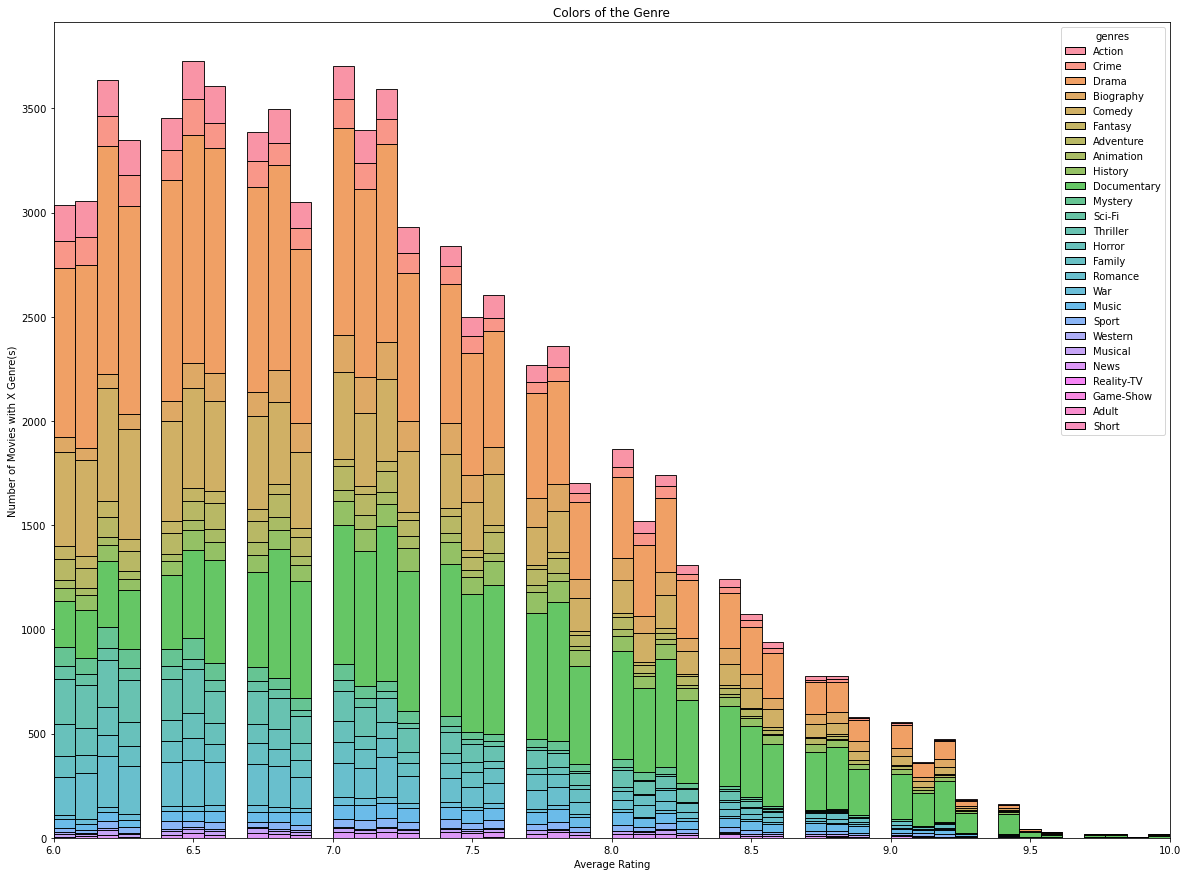

In [16]:
fig, ax = plt.subplots(figsize = (20,15))
sns.histplot(data=df, x="averagerating", hue="genres", multiple="stack")
ax.set_title('Colors of the Genre')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Number of Movies with X Genre(s)')
plt.xlim(6,10)
fig.savefig('images/Genre.png');

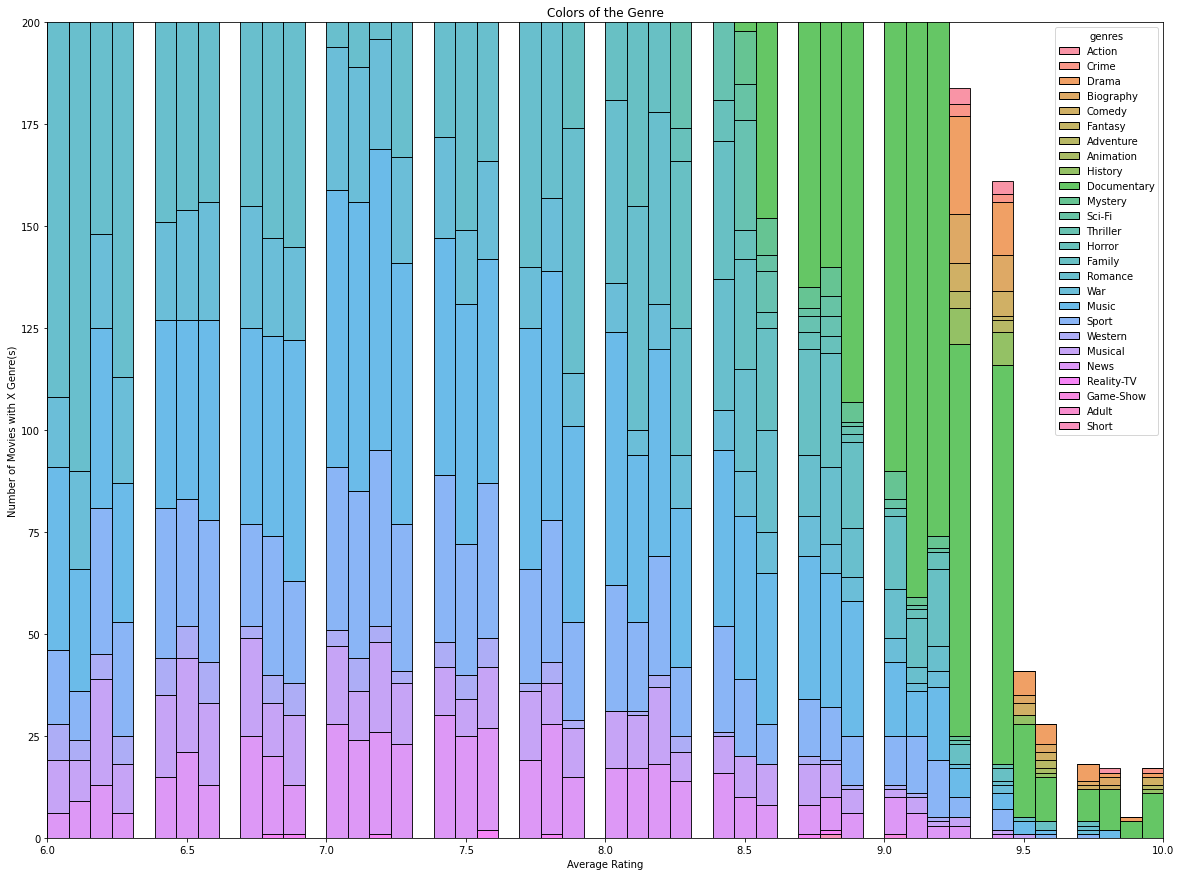

In [18]:
fig, ax = plt.subplots(figsize = (20,15))
sns.histplot(data=df, x="averagerating", hue="genres", multiple="stack")
ax.set_title('Colors of the Genre')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Number of Movies with X Genre(s)')
plt.xlim(6,10)
plt.ylim(0,200);

- We are determinging a successful movie as anything greater than 6.0. Based on visualizations above, we can see there are specific genres that do often score higher than others.
    - Action, drama, documentaries, adventure, mystery, and SciFi films usually score higher than others.

## Third Question: How will product budgets impact ratings?

In [26]:
budget = pd.read_csv('data/movie_profit.csv')
productbudget = budget.copy(deep=True)
productbudget

,primary_title,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...
5777,Red 11,"$7,000",$0,$0
5778,Following,"$6,000","$48,482","$240,495"
5779,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,A Plague So Pleasant,"$1,400",$0,$0


In [27]:
imdb_title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
MG = imdb_title_basics.copy(deep=True)
MG.drop(['original_title', 'start_year', 'runtime_minutes'], axis=1, inplace=True)
MG

,tconst,primary_title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy"
...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
146141,tt9916706,Dankyavar Danka,Comedy
146142,tt9916730,6 Gunn,NaN


In [25]:
MGB = pd.merge(MG, productbudget, on='primary_title')
MGB

,tconst,primary_title,genres,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,"Action,Animation,Comedy","$45,000,000",$0,"$73,706"
1,tt0293429,Mortal Kombat,"Action,Adventure,Fantasy","$20,000,000","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,NaN,"$200,000","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,"Comedy,Mystery","$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,"Adventure,Drama,Romance","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...
3810,tt9678962,Fuel,"Documentary,Sport","$2,500,000","$174,255","$174,255"
3811,tt9729206,Diner,Crime,"$5,000,000","$12,592,907","$12,592,907"
3812,tt9805168,Traitor,"Action,Drama,Romance","$22,000,000","$23,530,831","$27,882,226"
3813,tt9844102,Ray,Crime,"$40,000,000","$75,305,995","$124,823,094"


In [28]:
imdb_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
MR = imdb_ratings.copy(deep=True)
MR.drop(['numvotes'], axis=1, inplace=True)
MR

,tconst,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5
...,...,...
73851,tt9805820,8.1
73852,tt9844256,7.5
73853,tt9851050,4.7
73854,tt9886934,7.0


In [29]:
PR = pd.merge(MR, MGB, on='tconst')
PR.drop(['tconst', 'domestic_gross', 'worldwide_gross'], axis=1, inplace=True)
PR = PR.sort_values(by=['production_budget'], ascending=False)
PR

,averagerating,primary_title,genres,production_budget
208,7.6,Robin Hood,NaN,"$99,000,000"
2569,6.6,Robin Hood,"Action,Adventure,Drama","$99,000,000"
2055,5.3,Robin Hood,"Action,Adventure,Thriller","$99,000,000"
1293,6.3,Robin Hood,"Action,Drama","$99,000,000"
1397,7.1,The Peanuts Movie,"Adventure,Animation,Comedy","$99,000,000"
...,...,...,...,...
1635,2.2,Snow White: A Deadly Summer,Horror,"$1,000,000"
2126,7.0,1982,Drama,"$1,000,000"
2372,6.7,The Invitation,"Drama,Horror,Mystery","$1,000,000"
43,6.2,The Sisterhood of Night,"Drama,Mystery,Thriller","$1,000,000"


In [30]:
PR.dropna()

,averagerating,primary_title,genres,production_budget
2569,6.6,Robin Hood,"Action,Adventure,Drama","$99,000,000"
2055,5.3,Robin Hood,"Action,Adventure,Thriller","$99,000,000"
1293,6.3,Robin Hood,"Action,Drama","$99,000,000"
1397,7.1,The Peanuts Movie,"Adventure,Animation,Comedy","$99,000,000"
1921,6.4,Alien: Covenant,"Horror,Sci-Fi,Thriller","$97,000,000"
...,...,...,...,...
1635,2.2,Snow White: A Deadly Summer,Horror,"$1,000,000"
2126,7.0,1982,Drama,"$1,000,000"
2372,6.7,The Invitation,"Drama,Horror,Mystery","$1,000,000"
43,6.2,The Sisterhood of Night,"Drama,Mystery,Thriller","$1,000,000"


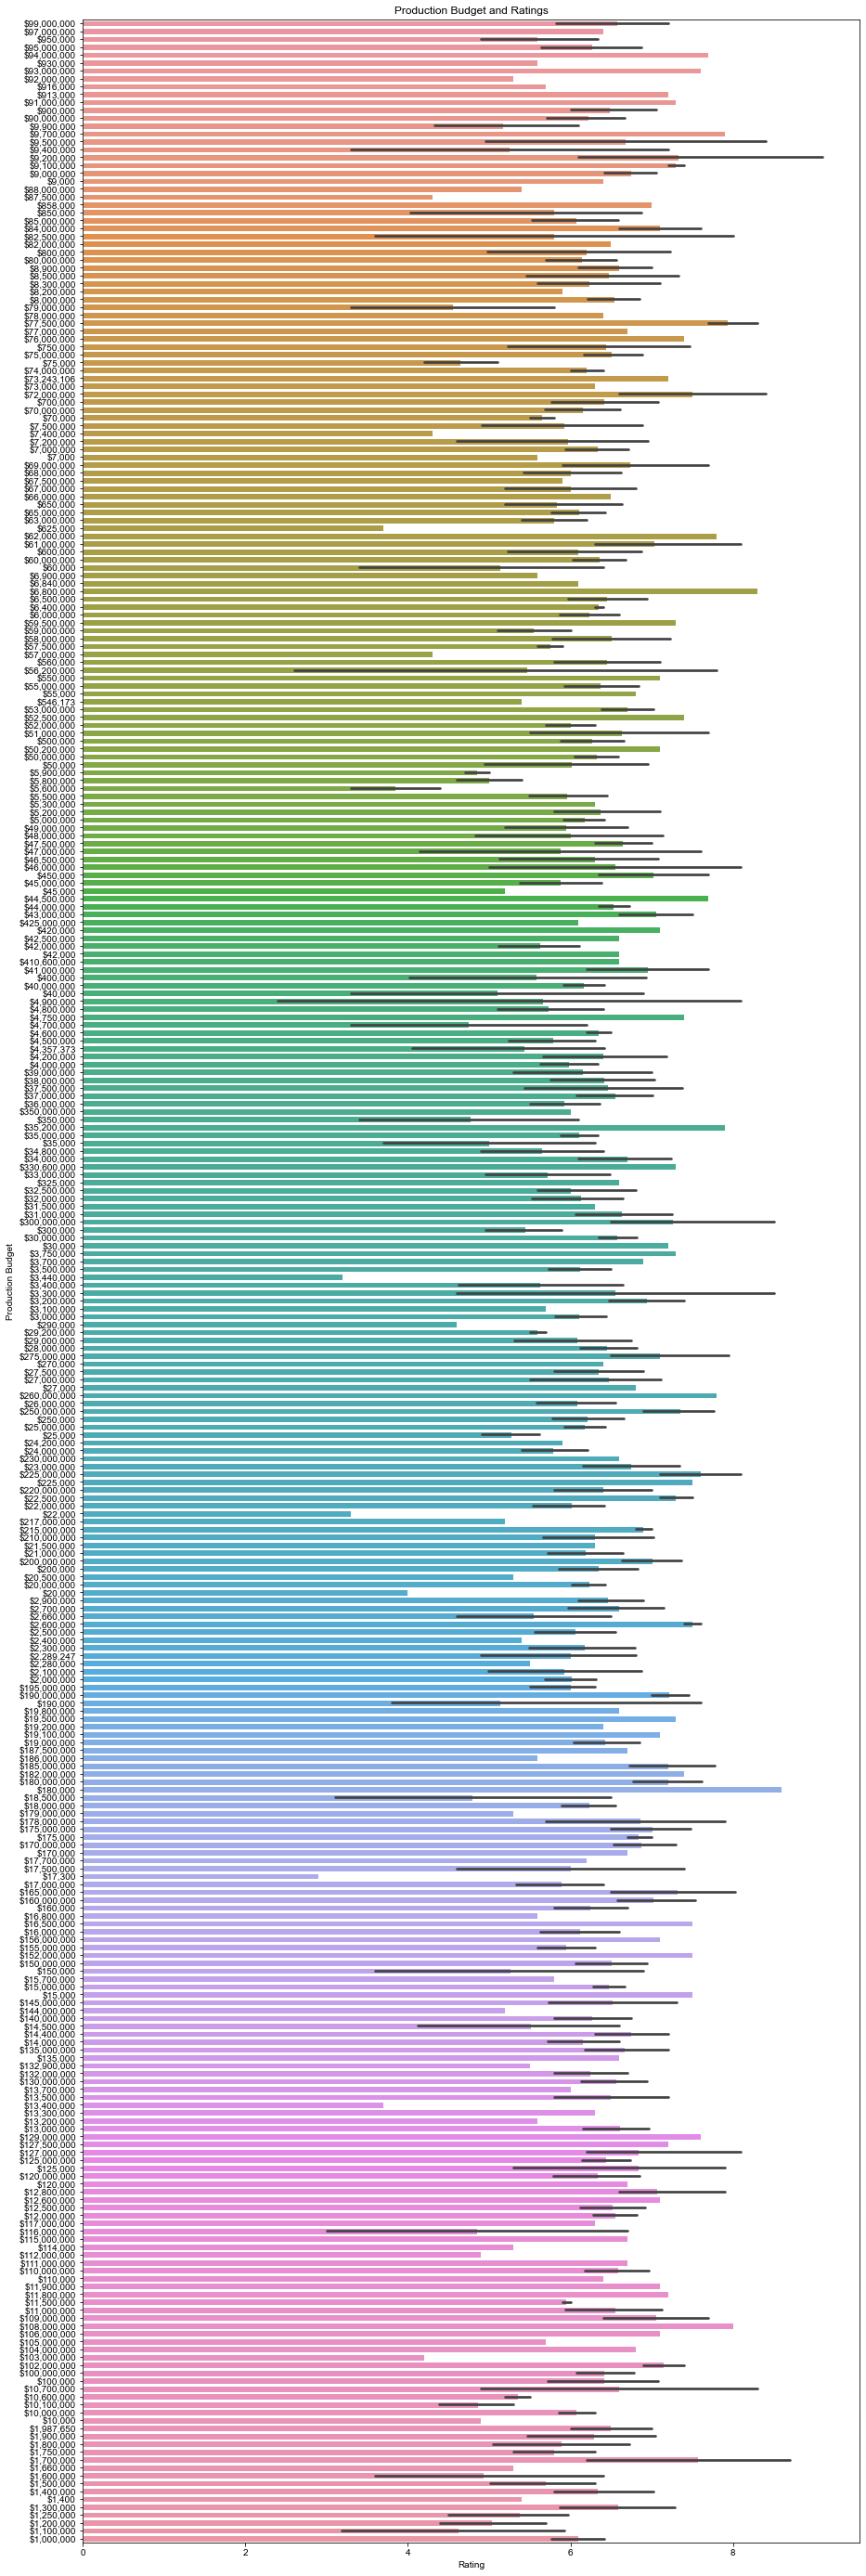

In [31]:
import seaborn as sns
f, ax = plt.subplots(figsize=(15, 50))
sns.set_theme(style="white")
sns.barplot(x="averagerating", y="production_budget", data=PR)
ax.set_title('Production Budget and Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Production Budget');

- ~2,900 values compared. We see a slight correlation between higher production value and higher movie ratings.
    - There was a film that had a 1,400 dollar production budget and almost got a six rating compared to a film with a 1.03 million dollar budget with a rating of just over 4. 

## Conclusions
Our job was to identify factors we believed will help Micosoft produce a successful film. The factor I looked into was rating and compared it with movie runtimes, genres, and production budgets. Our findings were as follows:

- There are no correlation between movie's runtime and its ratings.
- There are specific genre's commonly rated higher than others.
- There might be a slight correlation between a movie's production budget and its ratings.

Well, what can Microsoft do with this data? 

We were able to show that runtime and production budget doesn't matter towards ratings so it can focus on other important factors such as genre. If Microsoft can focus and produce a film that is a mixture of action, drama, adventure, and SciFi genres with a decent runtime and a great script, it will produce a film that will get great ratings and hopefully make profit.

## What's next? How can we use this data in the future? 

Questions to consider:

* Is there too much data?
    - Clean up the data more and look at less information.
* Is the analysis not deep enough?
    - Look at other variables such as ratings and total profit, independent production versus big production, and cast.
    - Look at using information from Rottentomatoes
